In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path=os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imageonlyone/berea8bit.tif


In [2]:
import cv2

## 1.  Data import and cleaning

In [3]:
import cv2
import numpy as np
from skimage import img_as_ubyte, img_as_float
from skimage.restoration import denoise_nl_means

# Load the image
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Convert image to float
img_float = img_as_float(img)

# Denoise using non-local means filter
denoised_img = denoise_nl_means(img_float, h=0.1, fast_mode=True, patch_size=5, patch_distance=3)

# Convert denoised image back to 8-bit
denoised_img = img_as_ubyte(denoised_img)


In [4]:
denoised_img

array([[147, 148, 152, ..., 138, 138, 139],
       [146, 148, 152, ..., 138, 138, 139],
       [146, 148, 153, ..., 138, 138, 139],
       ...,
       [136, 134, 134, ..., 121, 124, 125],
       [136, 135, 135, ..., 120, 124, 125],
       [136, 135, 135, ..., 121, 125, 127]], dtype=uint8)

## 2. Data visualization

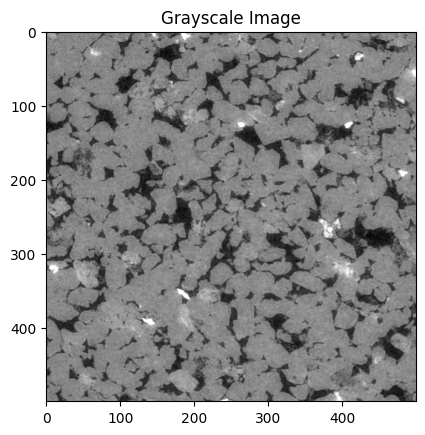

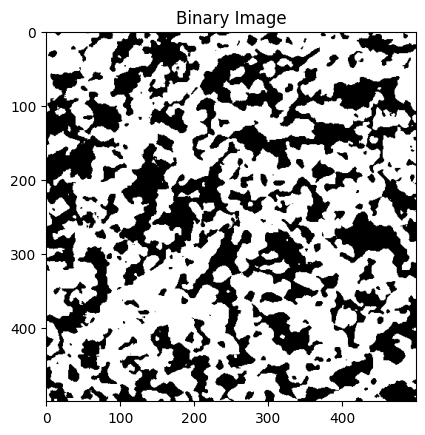

In [5]:
import matplotlib.pyplot as plt

# Display grayscale image
plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Thresholding for binary image
binary_img = cv2.threshold(denoised_img, 128, 255, cv2.THRESH_BINARY)[1]

# Display binary image
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
plt.show()


Advanced Visualization of Separated Pores


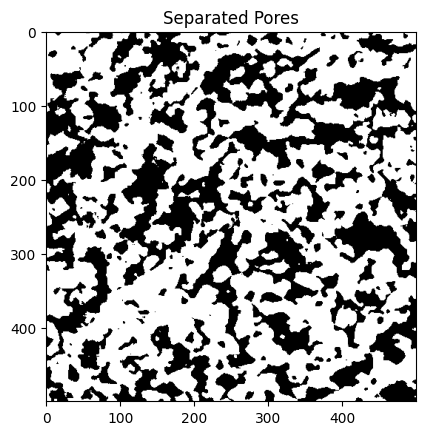

In [6]:
from skimage import morphology

# Apply morphological operations for advanced visualization
separated_pores = morphology.remove_small_objects(binary_img, min_size=30)

# Display advanced visualization
plt.imshow(separated_pores, cmap='gray')
plt.title('Separated Pores')
plt.show()


Heat Maps of Pore Size


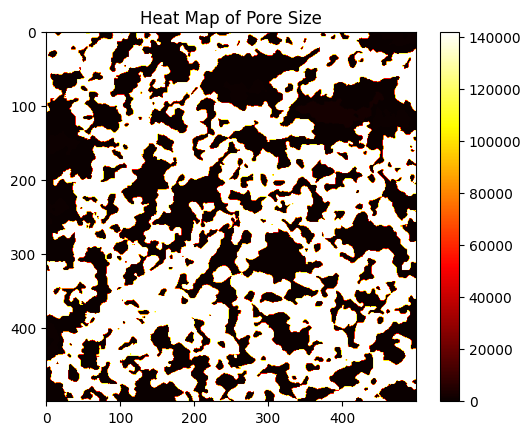

In [7]:
from skimage import measure

# Measure regions in the binary image
regions = measure.regionprops(measure.label(separated_pores))

# Create a heat map of pore sizes
heat_map = np.zeros_like(binary_img, dtype=float)
for region in regions:
    for coord in region.coords:
        heat_map[coord[0], coord[1]] = region.area

# Display the heat map
plt.imshow(heat_map, cmap='hot')
plt.title('Heat Map of Pore Size')
plt.colorbar()
plt.show()


## 3. Data Analysis


Simple Porosity Estimates


In [8]:
# Calculate simple porosity
total_pixels = img.size
porosity = np.sum(binary_img == 0) / total_pixels

print(f"Simple Porosity: {porosity:.4f}")


Simple Porosity: 0.3914


Kozeny-Carman Estimates of Permeability


In [9]:
# Assuming you have the required parameters
porosity = 0.25  # Update with the actual porosity value
radius = 0.005   # Update with the average pore radius

# Kozeny-Carman equation
permeability = (porosity**3) / (180 * (1 - porosity)**2 * radius**2)

print(f"Kozeny-Carman Permeability Estimate: {permeability:.4e} m^2")


Kozeny-Carman Permeability Estimate: 6.1728e+00 m^2


Blob Analysis of Pore Size


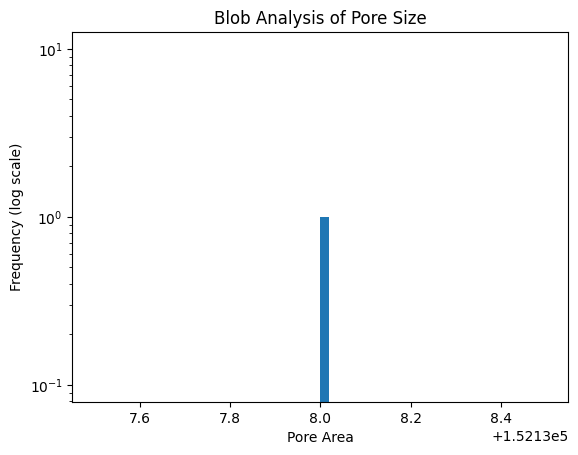

In [10]:
from skimage.measure import regionprops

# Measure regions in the binary image
regions = regionprops(binary_img)

# Extract areas of each region
areas = [region.area for region in regions]

# Plot histogram of pore sizes
plt.hist(areas, bins=50, log=True)
plt.title('Blob Analysis of Pore Size')
plt.xlabel('Pore Area')
plt.ylabel('Frequency (log scale)')
plt.show()
